Laboratorio II - Catalina García (201533110)

# Desigualdad y educación en Colombia: un análisis de la Prueba Saber 11 para los años 2019, 2020 y 2021 en el Calendario A

**_Caracterización de la muestra escogida_:** 

El objetivo de este trabajo es explorar, por medio de la Prueba Saber 11, cómo es el desempeño de los estudiantes en Colombia según sus características sociodemográficas. Para ello, utilizaré los años 2019, 2020 y 2021 sólo para el Calendario A de cada año. 

# Fase 1: obtener e inspeccionar archivos

In [1]:
#Importo librerias relevantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
pd.options.mode.chained_assignment = None 
import ipywidgets as widgets
import pandas as pd
import plotly.graph_objects as go
from ipywidgets import *

###  1.1 Importar bases de datos y exploración de compatibilidad

En este subpunto, importo cada base de datos de los años correspondientes a los seleccionados y exploro si estos contemplan las mismas columnas y si no es el caso, explorar cuáles y en cuál base de dato se encuentra. 

In [2]:
## Importo bases de datos de Prueba Saber 11 para periodos 2019-2, 2020-2 y 2021-2
df_20192 = pd.read_csv(r'Bases/SB11_20192.TXT', delimiter = '¬', encoding='utf-8', engine='python')
df_20202 = pd.read_csv(r'Bases/SB11_20202.TXT', delimiter = '¬', encoding='utf-8', engine='python')
df_20212 = pd.read_csv(r'Bases/SB11_20212.TXT', delimiter = '¬', encoding='utf-8', engine='python')

Busco similitudes y diferencias entre los dataframes:

In [3]:
# Genero una lista de dataframes
dataframes = [df_20192, df_20202, df_20212]

# Comparo los dataframes para saber si tienen las mismas columnas y son aptos para hacer un Append method
prueba = np.all([sorted(dataframes[0].columns) == sorted(i.columns) for i in dataframes])

# Prueba nos indica que las columna en los dataframes NO son iguales, empleamos el siguiente metodo para saber cual columna descartar
comparacion_2019_2020 = set(df_20192.dtypes.index) ^ set(df_20202.dtypes.index)
comparacion_2020_2021 = set(df_20202.dtypes.index) ^ set(df_20212.dtypes.index)
comparacion_2019_2021 = set(df_20192.dtypes.index) ^ set(df_20212.dtypes.index)

comp = set(df_20192.dtypes.index) ^ set(df_20202.dtypes.index)
comp.union(comparacion_2019_2021)

    ## El anterior test nos ayuda a saber que hay dos columnas que no se encuentran en los tres dataframes.

{'ESTU_ETNIA', 'PERCENTIL_ESPECIAL_GLOBAL'}

### 1.2.A. Limpieza de bases de datos (2019-2)

Considerando el subpunto anterior, se elige limpiar separadamente cada base de datos, ya que la estructura es diferente y por tanto, puede ser una mejor práctica ir por cada una, antes de hacer un append para utilizar una base de datos mater. 

#### Prueba Saber 11 (2019-2)
_**Dimensiones para el año 2019-2:**_ 

Para la base de datos del año 2019-2 podemos ver que las dimensiones son 546,212 entradas por 82 columnas. Esto, considerando que el nivel de observación son estudiantes, nos deja saber que 546,212 fueron encuestados para el periodo 2019-2 de los cuales tenemos 82 variables con esta información. 

In [4]:
## Exploración inicial de dimensión y tipo de variables 
df_20192.info() # 546212 x 82 variables


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546212 entries, 0 to 546211
Data columns (total 82 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             546212 non-null  object 
 1   ESTU_NACIONALIDAD              546212 non-null  object 
 2   ESTU_GENERO                    546106 non-null  object 
 3   ESTU_FECHANACIMIENTO           546212 non-null  object 
 4   PERIODO                        546212 non-null  int64  
 5   ESTU_CONSECUTIVO               546212 non-null  object 
 6   ESTU_ESTUDIANTE                546212 non-null  object 
 7   ESTU_TIENEETNIA                545835 non-null  object 
 8   ESTU_PAIS_RESIDE               546212 non-null  object 
 9   ESTU_ETNIA                     40009 non-null   object 
 10  ESTU_DEPTO_RESIDE              545835 non-null  object 
 11  ESTU_COD_RESIDE_DEPTO          545835 non-null  float64
 12  ESTU_MCPIO_RESIDE             

Como siguiente paso, exploramos los valores únicos que toma cada variable para definir con cuáles contar para el subconjunto de interés:

In [5]:
columns=[*df_20192.columns]
unique_values={}
for i in columns:
    unique_values[i]=df_20192[i].unique()
unique=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in unique_values.items() ]))
unique.fillna('').T

,0,1,2,3,4,5,6,7,8,9,...,546202,546203,546204,546205,546206,546207,546208,546209,546210,546211
ESTU_TIPODOCUMENTO,TI,CC,PEP,CE,NES,PE,CR,CCB,PC,RC,...,,,,,,,,,,
ESTU_NACIONALIDAD,COLOMBIA,VENEZUELA,ESPAÑA,ECUADOR,CROACIA,PERÚ,ITALIA,ESTADOS UNIDOS,FRANCIA,EL SALVADOR,...,,,,,,,,,,
ESTU_GENERO,M,F,,,,,,,,,...,,,,,,,,,,
ESTU_FECHANACIMIENTO,18/02/2002,24/01/2003,28/06/2003,02/06/2001,26/04/2002,22/05/2002,05/02/2002,08/04/1999,09/11/2002,14/08/2002,...,,,,,,,,,,
PERIODO,20194.0,,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ESTU_INSE_INDIVIDUAL,50.942156,61.920976,59.767864,50.764238,45.779135,,52.910946,45.006631,66.399071,56.554076,...,,,,,,,,,,
ESTU_NSE_INDIVIDUAL,2.0,3.0,,4.0,1.0,,,,,,...,,,,,,,,,,
ESTU_NSE_ESTABLECIMIENTO,2.0,3.0,4.0,1.0,,,,,,,...,,,,,,,,,,
ESTU_ESTADOINVESTIGACION,PUBLICAR,NO SE COMPROBO IDENTIDAD DEL EXAMINADO,VALIDEZ OFICINA JURÍDICA,,,,,,,,...,,,,,,,,,,


_**Selección de variables de interés**_

Dado al resultado anterior, consideramos que 82 variables pueden ser "muchas" para el análisis planteado. De esta forma, escogemos 14 variables que reflejan características sociodemográficas básicas para el análisis planteado.

In [6]:
## Creación de un nuevo dataframe con las columnas de interés
df_20192A = df_20192[['ESTU_GENERO',
                 'ESTU_FECHANACIMIENTO',
                 'ESTU_CONSECUTIVO',
                 'FAMI_ESTRATOVIVIENDA',
                 'FAMI_TIENEINTERNET',           
                 'FAMI_EDUCACIONPADRE',
                 'FAMI_EDUCACIONMADRE',
                 'ESTU_HORASSEMANATRABAJA',
                 'PUNT_LECTURA_CRITICA',
                 'PUNT_MATEMATICAS',
                 'PUNT_C_NATURALES',
                 'PUNT_SOCIALES_CIUDADANAS',
                 'PUNT_INGLES',
                 'PUNT_GLOBAL']]

Inspecciono el nuevo dataframe para saber los tipos de datos:

In [7]:
df_20192A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546212 entries, 0 to 546211
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ESTU_GENERO               546106 non-null  object 
 1   ESTU_FECHANACIMIENTO      546212 non-null  object 
 2   ESTU_CONSECUTIVO          546212 non-null  object 
 3   FAMI_ESTRATOVIVIENDA      511705 non-null  object 
 4   FAMI_TIENEINTERNET        515241 non-null  object 
 5   FAMI_EDUCACIONPADRE       515685 non-null  object 
 6   FAMI_EDUCACIONMADRE       515845 non-null  object 
 7   ESTU_HORASSEMANATRABAJA   529322 non-null  object 
 8   PUNT_LECTURA_CRITICA      546212 non-null  int64  
 9   PUNT_MATEMATICAS          546212 non-null  int64  
 10  PUNT_C_NATURALES          546212 non-null  int64  
 11  PUNT_SOCIALES_CIUDADANAS  546212 non-null  int64  
 12  PUNT_INGLES               546193 non-null  float64
 13  PUNT_GLOBAL               546212 non-null  i

**_Exploro duplicados por el ID de cada estudiante para cersiorarnos que no hayan_:** Confirmo a través del siguiente código que no hay duplicados.

In [8]:
duplicate = df_20192A[df_20192A.duplicated()]
 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_CONSECUTIVO,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_HORASSEMANATRABAJA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL


Ahora, después de explorar los tipos de datos, vemos que hay inconcistencias con el tipo de variables que nos gustaría tener. Sin embargo, antes de empezar a ajustar los tipos, procederemos a explorar los datos faltantes o no válidos en las columnas de interés y después ajustar los tipos.


_**Exploración de datos faltantes o no válidos en las columnas de interés**_:


Exploro valores nulos de las variables de interes que podrian ser usadas posteriormente en el modelo:

In [9]:
percent_missing_20192A = df_20192A.isnull().sum() * 100 / len(df_20192A)
missing_value_df20192A = pd.DataFrame({'column_name': df_20192A.columns,
                                 'percent_missing': percent_missing_20192A})

missing_value_df20192A.set_index('column_name')

,percent_missing
column_name,
ESTU_GENERO,0.019406
ESTU_FECHANACIMIENTO,0.000000
ESTU_CONSECUTIVO,0.000000
FAMI_ESTRATOVIVIENDA,6.317510
FAMI_TIENEINTERNET,5.670143
FAMI_EDUCACIONPADRE,5.588856
FAMI_EDUCACIONMADRE,5.559563
ESTU_HORASSEMANATRABAJA,3.092206
PUNT_LECTURA_CRITICA,0.000000


Visualmente, la distribución de valores nulos para esta base de datos, sería:

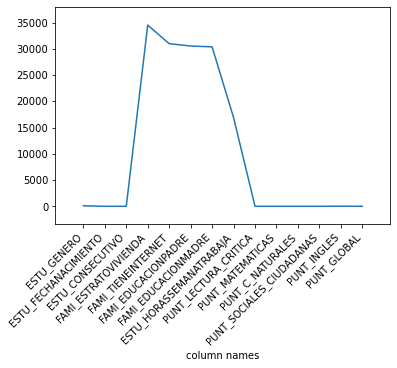

In [10]:
# Gráfico de valores nulos en la base de datos
null_df_20192A = df_20192A.apply(lambda x: sum(x.isnull())).to_frame(name= 'count')

plt.plot(null_df_20192A.index, null_df_20192A['count'])
plt.xticks(null_df_20192A.index, null_df_20192A.index, rotation=45,
horizontalalignment= 'right')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

Por el anterior dataframe, nos damos cuenta que las variables que hay 6 variables que contiene valores nulos. Sin embargo, antes de ajustar esto, explicaré el acercamiento individual que tendré con cada una individualmente.

  -  ESTU_GENERO: Crearé una segunda variable 'ESTU_GENERO_DUMMY' que tome valor 1 si es mujer y 0 si es hombre y a los valores faltantes, ingresar el valor de la mediana. 
  - ESTU_DEPTO_RESIDE: Esta variable permanecerá con los valores nulos.
  -  FAMI_ESTRATOVIVIENDA: Crearé una segunda variable a 'FAMI_ESTRATO_2' partir de esta, para volver esta variable a una categórica númerica, y a los valores faltantes, ingresar el valor de la mediana.
  -  FAMI_EDUCACIONPADRE: Crearé una segunda variable'FAMI_EDUPADRE_DUMMY' que tome valor 1 si tiene alguna educación formal y 0 si no tiene, ingresaré el valor de la mediana para lo n/a.
  -  FAMI_EDUCACIONMADRE: Crearé una segunda variable'FAMI_EDUPADRE_DUMMY' que tome valor 1 si tiene alguna educación formal y 0 si no tiene, ingresaré el valor de la mediana para lo n/a.
  -  ESTU_HORASSEMANATRABAJA: Crearé una segunda variable 'ESTU_TRABAJA' que tome valor 1 si trabaja cualquier hora y 0 si no trabaja o trabaja 0 horas. Reemplazaré los n/a con la mediana.
  -  PUNT_INGLES: Reemplazaré los n/a con la mediana.
  - FAMI_TIENEINTERNET: Crearé una segunda variable 'FAMI_TIENEINTERNET_DUMMY' que tome valor 1 si tiene internet y 0 si no, ingresaré el valor de la mediana para lo n/a.

**A. ESTU_GENERO**

In [11]:
# Creación de estu_genero_dummy
def ESTU_GEN_DUMMY(df_20192A):
    val = None   
    if df_20192A['ESTU_GENERO'] == 'F':
        val = 1
    elif df_20192A['ESTU_GENERO'] == 'M':
        val = 0     
    return val
df_20192A['ESTU_GENERO_DUMMY'] = df_20192A.apply(ESTU_GEN_DUMMY, axis=1)

# Reemplazo NaN por la mediana
df_20192A['ESTU_GENERO_DUMMY'] = df_20192A['ESTU_GENERO_DUMMY'].fillna(df_20192A['ESTU_GENERO_DUMMY'].median())

**B. FAMI_ESTRATOVIVIENDA**

In [12]:
# Creación de fami_estrato_2
def ESTRATO(df_20192A):
    
    val = None
    
    if df_20192A['FAMI_ESTRATOVIVIENDA'] == 'Estrato 1':
        val = 1
    elif df_20192A['FAMI_ESTRATOVIVIENDA'] == 'Estrato 2':
        val = 2
    elif df_20192A['FAMI_ESTRATOVIVIENDA'] == 'Estrato 3':
        val = 3
    elif df_20192A['FAMI_ESTRATOVIVIENDA'] == 'Estrato 4':
        val = 4
    elif df_20192A['FAMI_ESTRATOVIVIENDA'] == 'Estrato 5':
        val = 5
    elif df_20192A['FAMI_ESTRATOVIVIENDA'] == 'Estrato 6':
        val = 6
    elif df_20192A['FAMI_ESTRATOVIVIENDA'] == 'Sin Estrato':
        val = 999
    
    return val
        
df_20192A['FAMI_ESTRATO_2'] = df_20192A.apply(ESTRATO, axis=1)

# Reemplazo NaN por la mediana
df_20192A['FAMI_ESTRATO_2'] = df_20192A['FAMI_ESTRATO_2'].fillna(df_20192A['FAMI_ESTRATO_2'].median())

**C. FAMI_EDUCACIONPADRE**

In [13]:
# Creación de fami_edupadre_dummy
def EDUPADRE(df_20192A):
    
    val = None
    
    if (df_20192A['FAMI_EDUCACIONPADRE'] == 'Educación profesional completa') or (df_20192A['FAMI_EDUCACIONPADRE'] == 'Técnica o tecnológica completa') or (df_20192A['FAMI_EDUCACIONPADRE'] == 'Secundaria (Bachillerato) completa') or (df_20192A['FAMI_EDUCACIONPADRE'] == 'Primaria incompleta') or (df_20192A['FAMI_EDUCACIONPADRE'] == 'Secundaria (Bachillerato) incompleta') or (df_20192A['FAMI_EDUCACIONPADRE'] == 'Primaria completa') or  (df_20192A['FAMI_EDUCACIONPADRE'] == 'Educación profesional incompleta') or (df_20192A['FAMI_EDUCACIONPADRE'] == 'Postgrado') or (df_20192A['FAMI_EDUCACIONPADRE'] == 'Técnica o tecnológica incompleta'):
        val = 1 
    elif (df_20192A['FAMI_EDUCACIONPADRE'] == 'No sabe') or (df_20192A['FAMI_EDUCACIONPADRE'] == 'No Aplica') or (df_20192A['FAMI_EDUCACIONPADRE'] == 'Ninguno'):
        val = 0           
    return val 

df_20192A['FAMI_EDUPADRE_DUMMY'] = df_20192A.apply(EDUPADRE, axis=1)

# Reemplazo NaN por la mediana
df_20192A['FAMI_EDUPADRE_DUMMY'] = df_20192A['FAMI_EDUPADRE_DUMMY'].fillna(df_20192A['FAMI_EDUPADRE_DUMMY'].median())       

**D. FAMI_EDUCACIONMADRE**

In [14]:
# Creación fami_edumadre_dummy
def EDUMADRE(df_20192A):
    
    val = None
    
    if (df_20192A['FAMI_EDUCACIONMADRE'] == 'Educación profesional completa') or (df_20192A['FAMI_EDUCACIONMADRE'] == 'Técnica o tecnológica completa') or (df_20192A['FAMI_EDUCACIONMADRE'] == 'Secundaria (Bachillerato) completa') or (df_20192A['FAMI_EDUCACIONMADRE'] == 'Primaria incompleta') or (df_20192A['FAMI_EDUCACIONMADRE'] == 'Secundaria (Bachillerato) incompleta') or (df_20192A['FAMI_EDUCACIONMADRE'] == 'Primaria completa') or  (df_20192A['FAMI_EDUCACIONMADRE'] == 'Educación profesional incompleta') or (df_20192A['FAMI_EDUCACIONMADRE'] == 'Postgrado') or (df_20192A['FAMI_EDUCACIONMADRE'] == 'Técnica o tecnológica incompleta'):
        val = 1 
    elif (df_20192A['FAMI_EDUCACIONMADRE'] == 'No sabe') or (df_20192A['FAMI_EDUCACIONMADRE'] == 'No Aplica') or (df_20192A['FAMI_EDUCACIONMADRE'] == 'Ninguno'):
        val = 0           
    return val 

df_20192A['FAMI_EDUMADRE_DUMMY'] = df_20192A.apply(EDUMADRE, axis=1)

# Reemplazo NaN por la mediana
df_20192A['FAMI_EDUMADRE_DUMMY'] = df_20192A['FAMI_EDUMADRE_DUMMY'].fillna(df_20192A['FAMI_EDUMADRE_DUMMY'].median())       

**E. ESTU_HORASSEMANATRABAJA**

In [15]:
# Creación de estu_trabaja
def TRABAJA(df_20192A): 
    val = None 
    if (df_20192A['ESTU_HORASSEMANATRABAJA'] == 'Menos de 10 horas') or (df_20192A['ESTU_HORASSEMANATRABAJA'] == 'Más de 30 horas') or (df_20192A['ESTU_HORASSEMANATRABAJA'] == 'Entre 21 y 30 horas') or (df_20192A['ESTU_HORASSEMANATRABAJA'] == 'Entre 11 y 20 horas'):
        val = 1
    elif (df_20192A['ESTU_HORASSEMANATRABAJA'] == '0'):
        val = 0 
    return val 

df_20192A['ESTU_TRABAJA'] = df_20192A.apply(TRABAJA, axis=1)

# Reemplazo NaN por la mediana
df_20192A['ESTU_TRABAJA'] = df_20192A['ESTU_TRABAJA'].fillna(df_20192A['ESTU_TRABAJA'].median())       
    

**F. PUNT_INGLES**

In [16]:
# Reemplazo NaN por la mediana
df_20192A['PUNT_INGLES'] = df_20192A['PUNT_INGLES'].fillna(df_20192A['PUNT_INGLES'].median())


**G. FAMI_TIENEINTERNET**

In [17]:
# Creación de fami_tieneinternet_dummy
def INTERNET(df_20192A): 
    val = None 
    if df_20192A['FAMI_TIENEINTERNET'] == 'Si':
        val = 1
    elif df_20192A['FAMI_TIENEINTERNET'] == 'No':
        val = 0 
    return val 

df_20192A['FAMI_TIENEINTERNET_DUMMY'] = df_20192A.apply(INTERNET, axis=1)

# Reemplazo NaN por la mediana
df_20192A['FAMI_TIENEINTERNET_DUMMY'] = df_20192A['FAMI_TIENEINTERNET_DUMMY'].fillna(df_20192A['FAMI_TIENEINTERNET_DUMMY'].median())  

_**Creación de variable edad - Limpieza de ESTU_FECHANACIMIENTO**_:

In [18]:
# Convierto de object a dateformat
df_20192A['ESTU_FECHANACIMIENTO'] =  pd.to_datetime(df_20192A['ESTU_FECHANACIMIENTO'], format='%d/%m/%Y')

# Extraigo el año 
df_20192A['ANO_NACIMIENTO'] = df_20192A['ESTU_FECHANACIMIENTO'].dt.year

# Var para el año de identificar HOY
today = date.today().year

# Calculo edad al día de hoy
df_20192A['EDAD'] = today - df_20192A['ANO_NACIMIENTO']

_**Identificación de base**_: Para poder identificar esta base de datos al momento de hacer el append para consolidar mi base master, creo una nueva columna de identificación:

In [19]:
df_20192A['BASE_ID'] = 'Saber11_20192'

### 1.2.B. Limpieza de bases de datos (2020-2)

#### Prueba Saber 11 (2020-2)
_**Dimensiones para el año 2020-2:**_ 

Para la base de datos del año 2020-2 podemos ver que las dimensiones son 504,872 entradas por 81 columnas. Esto, considerando que el nivel de observación son estudiantes, nos deja saber que 504,872 fueron encuestados para el periodo 2020-2 de los cuales tenemos 81 variables con esta información. 

In [20]:
df_20202.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504872 entries, 0 to 504871
Data columns (total 81 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             504872 non-null  object 
 1   ESTU_NACIONALIDAD              504872 non-null  object 
 2   ESTU_GENERO                    504864 non-null  object 
 3   ESTU_FECHANACIMIENTO           504872 non-null  object 
 4   PERIODO                        504872 non-null  int64  
 5   ESTU_CONSECUTIVO               504872 non-null  object 
 6   ESTU_ESTUDIANTE                504872 non-null  object 
 7   ESTU_PAIS_RESIDE               504872 non-null  object 
 8   ESTU_TIENEETNIA                501879 non-null  object 
 9   ESTU_DEPTO_RESIDE              504870 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO          504870 non-null  float64
 11  ESTU_MCPIO_RESIDE              504870 non-null  object 
 12  ESTU_COD_RESIDE_MCPIO         

Como siguiente paso, exploramos los valores únicos que trae cada columna para poder hacer una escogencia de cuales variables quedarse:

In [21]:
columns=[*df_20202.columns]
unique_values={}
for i in columns:
    unique_values[i]=df_20202[i].unique()
unique=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in unique_values.items() ]))
unique.fillna('').T

,0,1,2,3,4,5,6,7,8,9,...,504862,504863,504864,504865,504866,504867,504868,504869,504870,504871
ESTU_TIPODOCUMENTO,TI,CC,CE,CR,NES,PEP,PE,RC,V,NUIP,...,,,,,,,,,,
ESTU_NACIONALIDAD,COLOMBIA,VENEZUELA,CUBA,ESTADOS UNIDOS,ECUADOR,ARGENTINA,GUATEMALA,PANAMÁ,LITUANIA,CABO VERDE,...,,,,,,,,,,
ESTU_GENERO,M,F,,,,,,,,,...,,,,,,,,,,
ESTU_FECHANACIMIENTO,03/07/2003,16/06/2003,11/09/2003,05/03/2004,30/08/2003,30/11/2001,01/08/2001,26/01/2003,27/11/2003,23/11/2003,...,,,,,,,,,,
PERIODO,20204.0,,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ESTU_INSE_INDIVIDUAL,61.34084,71.825844,57.286312,67.476602,43.877158,40.980109,52.194676,53.130457,48.603959,44.146826,...,,,,,,,,,,
ESTU_NSE_INDIVIDUAL,3.0,4.0,2.0,1.0,,,,,,,...,,,,,,,,,,
ESTU_NSE_ESTABLECIMIENTO,3.0,4.0,2.0,1.0,,,,,,,...,,,,,,,,,,
ESTU_ESTADOINVESTIGACION,PUBLICAR,VALIDEZ OFICINA JURÍDICA,,,,,,,,,...,,,,,,,,,,


_**Selección de variables de interés**_

In [22]:
## Creación de un nuevo dataframe con las columnas de interés
df_20202A = df_20202[['ESTU_GENERO',
                 'ESTU_FECHANACIMIENTO',
                 'ESTU_CONSECUTIVO',
                 'FAMI_ESTRATOVIVIENDA',
                 'FAMI_EDUCACIONPADRE',
                 'FAMI_EDUCACIONMADRE',
                 'ESTU_HORASSEMANATRABAJA',
                 'FAMI_TIENEINTERNET',
                 'PUNT_LECTURA_CRITICA',
                 'PUNT_MATEMATICAS',
                 'PUNT_C_NATURALES',
                 'PUNT_SOCIALES_CIUDADANAS',
                 'PUNT_INGLES',
                 'PUNT_GLOBAL']]

**_Exploro duplicados por el ID de cada estudiante para cersiorarnos que no hayan_:** Confirmo a través del siguiente código que no hay duplicados.

In [23]:
duplicate = df_20202A[df_20202A.duplicated()]
 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_CONSECUTIVO,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_HORASSEMANATRABAJA,FAMI_TIENEINTERNET,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL


Inspecciono el nuevo dataframe para saber los tipos de datos:

In [24]:
df_20202A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504872 entries, 0 to 504871
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ESTU_GENERO               504864 non-null  object 
 1   ESTU_FECHANACIMIENTO      504872 non-null  object 
 2   ESTU_CONSECUTIVO          504872 non-null  object 
 3   FAMI_ESTRATOVIVIENDA      487920 non-null  object 
 4   FAMI_EDUCACIONPADRE       491882 non-null  object 
 5   FAMI_EDUCACIONMADRE       491386 non-null  object 
 6   ESTU_HORASSEMANATRABAJA   487888 non-null  object 
 7   FAMI_TIENEINTERNET        491207 non-null  object 
 8   PUNT_LECTURA_CRITICA      504872 non-null  int64  
 9   PUNT_MATEMATICAS          504872 non-null  int64  
 10  PUNT_C_NATURALES          504872 non-null  int64  
 11  PUNT_SOCIALES_CIUDADANAS  504872 non-null  int64  
 12  PUNT_INGLES               504538 non-null  float64
 13  PUNT_GLOBAL               504872 non-null  i

Ahora, después de explorar los tipos de datos, vemos que hay inconcistencias con el tipo de variables que nos gustaría tener. Sin embargo, antes de empezar a ajustar los tipos, procederemos a explorar los datos faltantes o no válidos en las columnas de interés y después ajustar los tipos.


_**Exploración de datos faltantes o no válidos en las columnas de interés**_:


Exploro valores nulos de las variables de interes que podrian ser usadas posteriormente en el modelo:

In [25]:
percent_missing_20202A = df_20202A.isnull().sum() * 100 / len(df_20202A)
missing_value_df20202A = pd.DataFrame({'column_name': df_20202A.columns,
                                 'percent_missing': percent_missing_20202A})

missing_value_df20202A.set_index('column_name')

,percent_missing
column_name,
ESTU_GENERO,0.001585
ESTU_FECHANACIMIENTO,0.000000
ESTU_CONSECUTIVO,0.000000
FAMI_ESTRATOVIVIENDA,3.357683
FAMI_EDUCACIONPADRE,2.572929
FAMI_EDUCACIONMADRE,2.671172
ESTU_HORASSEMANATRABAJA,3.364021
FAMI_TIENEINTERNET,2.706627
PUNT_LECTURA_CRITICA,0.000000


Visualmente, la distribución de valores nulos para esta base de datos, sería:

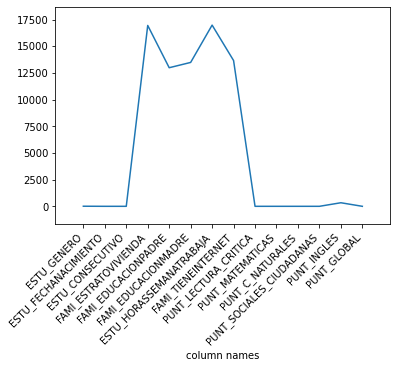

In [26]:
# Gráfico de valores nulos en la base de datos
null_df_20202A = df_20202A.apply(lambda x: sum(x.isnull())).to_frame(name= 'count')

plt.plot(null_df_20202A.index, null_df_20202A['count'])
plt.xticks(null_df_20202A.index, null_df_20202A.index, rotation=45,
horizontalalignment= 'right')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

Por el anterior dataframe, nos damos cuenta que las variables que hay 7 variables que contiene valores nulos. Sin embargo, antes de ajustar esto, explicaré el acercamiento individual que tendré con cada una individualmente.

  -  ESTU_GENERO: Crearé una segunda variable 'ESTU_GENERO_DUMMY' que tome valor 1 si es mujer y 0 si es hombre y a los valores faltantes, ingresar el valor de la mediana. 
  - ESTU_DEPTO_RESIDE: Esta variable permanecerá con los valores nulos.
  -  FAMI_ESTRATOVIVIENDA: Crearé una segunda variable a 'FAMI_ESTRATO_2' partir de esta, para volver esta variable a una categórica númerica, y a los valores faltantes, ingresar el valor de la mediana.
  -  FAMI_EDUCACIONPADRE: Crearé una segunda variable'FAMI_EDUPADRE_DUMMY' que tome valor 1 si tiene alguna educación formal y 0 si no tiene, ingresaré el valor de la mediana para lo n/a.
  -  FAMI_EDUCACIONMADRE: Crearé una segunda variable'FAMI_EDUPADRE_DUMMY' que tome valor 1 si tiene alguna educación formal y 0 si no tiene, ingresaré el valor de la mediana para lo n/a.
  -  ESTU_HORASSEMANATRABAJA: Crearé una segunda variable 'ESTU_TRABAJA' que tome valor 1 si trabaja cualquier hora y 0 si no trabaja o trabaja 0 horas. Reemplazaré los n/a con la mediana.
  -  PUNT_INGLES: Reemplazaré los n/a con la mediana.
  - FAMI_TIENEINTERNET: Crearé una segunda variable 'FAMI_TIENEINTERNET_DUMMY' que tome valor 1 si tiene internet y 0 si no, ingresaré el valor de la mediana para lo n/a.

**A. ESTU_GENERO**

In [27]:
# Creación de estu_genero_dummy
def ESTU_GEN_DUMMY(df_20202A):
    val = None   
    if df_20202A['ESTU_GENERO'] == 'F':
        val = 1
    elif df_20202A['ESTU_GENERO'] == 'M':
        val = 0     
    return val
df_20202A['ESTU_GENERO_DUMMY'] = df_20202A.apply(ESTU_GEN_DUMMY, axis=1)

# Reemplazo NaN por la mediana
df_20202A['ESTU_GENERO_DUMMY'] = df_20202A['ESTU_GENERO_DUMMY'].fillna(df_20202A['ESTU_GENERO_DUMMY'].median())

**B. FAMI_ESTRATOVIVIENDA**

In [28]:
# Creación de fami_estrato_2
def ESTRATO(df_20202A):
    
    val = None
    
    if df_20202A['FAMI_ESTRATOVIVIENDA'] == 'Estrato 1':
        val = 1
    elif df_20202A['FAMI_ESTRATOVIVIENDA'] == 'Estrato 2':
        val = 2
    elif df_20202A['FAMI_ESTRATOVIVIENDA'] == 'Estrato 3':
        val = 3
    elif df_20202A['FAMI_ESTRATOVIVIENDA'] == 'Estrato 4':
        val = 4
    elif df_20202A['FAMI_ESTRATOVIVIENDA'] == 'Estrato 5':
        val = 5
    elif df_20202A['FAMI_ESTRATOVIVIENDA'] == 'Estrato 6':
        val = 6
    elif df_20202A['FAMI_ESTRATOVIVIENDA'] == 'Sin Estrato':
        val = 999
    
    return val
        
df_20202A['FAMI_ESTRATO_2'] = df_20202A.apply(ESTRATO, axis=1)

# Reemplazo NaN por la mediana
df_20202A['FAMI_ESTRATO_2'] = df_20202A['FAMI_ESTRATO_2'].fillna(df_20202A['FAMI_ESTRATO_2'].median())

**C. FAMI_EDUCACIONPADRE**

In [29]:
# Creación de fami_edupadre_dummy
def EDUPADRE(df_20202A):
    
    val = None
    
    if (df_20202A['FAMI_EDUCACIONPADRE'] == 'Educación profesional completa') or (df_20202A['FAMI_EDUCACIONPADRE'] == 'Técnica o tecnológica completa') or (df_20202A['FAMI_EDUCACIONPADRE'] == 'Secundaria (Bachillerato) completa') or (df_20202A['FAMI_EDUCACIONPADRE'] == 'Primaria incompleta') or (df_20202A['FAMI_EDUCACIONPADRE'] == 'Secundaria (Bachillerato) incompleta') or (df_20202A['FAMI_EDUCACIONPADRE'] == 'Primaria completa') or  (df_20202A['FAMI_EDUCACIONPADRE'] == 'Educación profesional incompleta') or (df_20202A['FAMI_EDUCACIONPADRE'] == 'Postgrado') or (df_20202A['FAMI_EDUCACIONPADRE'] == 'Técnica o tecnológica incompleta'):
        val = 1 
    elif (df_20202A['FAMI_EDUCACIONPADRE'] == 'No sabe') or (df_20202A['FAMI_EDUCACIONPADRE'] == 'No Aplica') or (df_20202A['FAMI_EDUCACIONPADRE'] == 'Ninguno'):
        val = 0           
    return val 

df_20202A['FAMI_EDUPADRE_DUMMY'] = df_20202A.apply(EDUPADRE, axis=1)

# Reemplazo NaN por la mediana
df_20202A['FAMI_EDUPADRE_DUMMY'] = df_20202A['FAMI_EDUPADRE_DUMMY'].fillna(df_20202A['FAMI_EDUPADRE_DUMMY'].median())       

**D. FAMI_EDUCACIONMADRE**

In [30]:
# Creación fami_edumadre_dummy
def EDUMADRE(df_20202A):
    
    val = None
    
    if (df_20202A['FAMI_EDUCACIONMADRE'] == 'Educación profesional completa') or (df_20202A['FAMI_EDUCACIONMADRE'] == 'Técnica o tecnológica completa') or (df_20202A['FAMI_EDUCACIONMADRE'] == 'Secundaria (Bachillerato) completa') or (df_20202A['FAMI_EDUCACIONMADRE'] == 'Primaria incompleta') or (df_20202A['FAMI_EDUCACIONMADRE'] == 'Secundaria (Bachillerato) incompleta') or (df_20202A['FAMI_EDUCACIONMADRE'] == 'Primaria completa') or  (df_20202A['FAMI_EDUCACIONMADRE'] == 'Educación profesional incompleta') or (df_20202A['FAMI_EDUCACIONMADRE'] == 'Postgrado') or (df_20202A['FAMI_EDUCACIONMADRE'] == 'Técnica o tecnológica incompleta'):
        val = 1 
    elif (df_20202A['FAMI_EDUCACIONMADRE'] == 'No sabe') or (df_20202A['FAMI_EDUCACIONMADRE'] == 'No Aplica') or (df_20202A['FAMI_EDUCACIONMADRE'] == 'Ninguno'):
        val = 0           
    return val 

df_20202A['FAMI_EDUMADRE_DUMMY'] = df_20202A.apply(EDUMADRE, axis=1)

# Reemplazo NaN por la mediana
df_20202A['FAMI_EDUMADRE_DUMMY'] = df_20202A['FAMI_EDUMADRE_DUMMY'].fillna(df_20202A['FAMI_EDUMADRE_DUMMY'].median())       

**E. ESTU_HORASSEMANATRABAJA**

In [31]:
# Creación de estu_trabaja
def TRABAJA(df_20202A): 
    val = None 
    if (df_20202A['ESTU_HORASSEMANATRABAJA'] == 'Menos de 10 horas') or (df_20202A['ESTU_HORASSEMANATRABAJA'] == 'Más de 30 horas') or (df_20202A['ESTU_HORASSEMANATRABAJA'] == 'Entre 21 y 30 horas') or (df_20202A['ESTU_HORASSEMANATRABAJA'] == 'Entre 11 y 20 horas'):
        val = 1
    elif (df_20202A['ESTU_HORASSEMANATRABAJA'] == '0'):
        val = 0 
    return val 

df_20202A['ESTU_TRABAJA'] = df_20202A.apply(TRABAJA, axis=1)

# Reemplazo NaN por la mediana
df_20202A['ESTU_TRABAJA'] = df_20202A['ESTU_TRABAJA'].fillna(df_20202A['ESTU_TRABAJA'].median())  

**F. PUNT_INGLES**

In [32]:
# Reemplazo NaN por la mediana
df_20202A['PUNT_INGLES'] = df_20202A['PUNT_INGLES'].fillna(df_20202A['PUNT_INGLES'].median())

**G. FAMI_TIENEINTERNET**

In [33]:
# Creación de fami_tieneinternet_dummy
def INTERNET(df_20202A): 
    val = None 
    if df_20202A['FAMI_TIENEINTERNET'] == 'Si':
        val = 1
    elif df_20202A['FAMI_TIENEINTERNET'] == 'No':
        val = 0 
    return val 

df_20202A['FAMI_TIENEINTERNET_DUMMY'] = df_20202A.apply(INTERNET, axis=1)

# Reemplazo NaN por la mediana
df_20202A['FAMI_TIENEINTERNET_DUMMY'] = df_20202A['FAMI_TIENEINTERNET_DUMMY'].fillna(df_20202A['FAMI_TIENEINTERNET_DUMMY'].median())  

_**Creación de variable edad - Limpieza de ESTU_FECHANACIMIENTO**_:

1 - Al intentar cambiar el tipo a datetime, nos encontramos con un error, procedemos un proceso para saber cuáles son las fechas con complicaciones y las arreglamos manualmente.

In [34]:
# Convertir object a dateformat tiene un error, creo ESTU_FECHA2 para ver las fechas que tienen complicaciones
df_20202A['ESTU_FECHA2'] =  pd.to_datetime(df_20202A['ESTU_FECHANACIMIENTO'], format = '%d/%m/%Y', errors='coerce')

In [35]:
# Exploro la lista de fechas con complicaciones y encuentro que hay un 0 donde debería haber un 2. 
df_20202A[df_20202A['ESTU_FECHA2'].isna()]

,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_CONSECUTIVO,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_HORASSEMANATRABAJA,FAMI_TIENEINTERNET,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,...,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_GENERO_DUMMY,FAMI_ESTRATO_2,FAMI_EDUPADRE_DUMMY,FAMI_EDUMADRE_DUMMY,ESTU_TRABAJA,FAMI_TIENEINTERNET_DUMMY,ESTU_FECHA2
131867,F,03/10/0002,SB11202040389433,Estrato 3,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,NaN,No,49,42,...,45,42.0,223,1.0,3.0,1.0,1.0,0.0,0.0,NaT
141775,F,20/02/0002,SB11202040574360,NaN,NaN,NaN,NaN,NaN,71,69,...,72,76.0,357,1.0,2.0,1.0,1.0,0.0,1.0,NaT
141789,F,22/08/0003,SB11202040574512,NaN,NaN,NaN,NaN,NaN,57,65,...,61,60.0,308,1.0,2.0,1.0,1.0,0.0,1.0,NaT
141791,F,16/02/0003,SB11202040574270,NaN,NaN,NaN,NaN,NaN,50,38,...,42,78.0,241,1.0,2.0,1.0,1.0,0.0,1.0,NaT
161519,M,05/08/1195,SB11202040568413,Estrato 2,Primaria incompleta,Primaria incompleta,Más de 30 horas,No,54,58,...,45,41.0,241,0.0,2.0,1.0,1.0,1.0,0.0,NaT
189171,M,23/01/0004,SB11202040574250,NaN,NaN,NaN,NaN,NaN,73,70,...,71,72.0,357,0.0,2.0,1.0,1.0,0.0,1.0,NaT
236219,F,17/12/0001,SB11202040574318,NaN,NaN,NaN,NaN,NaN,77,72,...,76,100.0,371,1.0,2.0,1.0,1.0,0.0,1.0,NaT
251953,F,13/07/0001,SB11202040574260,NaN,NaN,NaN,NaN,NaN,62,70,...,67,75.0,328,1.0,2.0,1.0,1.0,0.0,1.0,NaT
283534,M,11/06/0004,SB11202040574247,NaN,NaN,NaN,NaN,NaN,75,78,...,72,66.0,366,0.0,2.0,1.0,1.0,0.0,1.0,NaT
283563,M,30/06/0002,SB11202040577497,Estrato 5,Postgrado,Postgrado,0,Si,73,71,...,73,78.0,363,0.0,5.0,1.0,1.0,0.0,1.0,NaT


In [36]:
# Limpio manualmente los errors de digitación
df_20202A['ESTU_FECHANACIMIENTO'] = df_20202A['ESTU_FECHANACIMIENTO'].replace(['03/10/0002'],'03/10/2002')
df_20202A['ESTU_FECHANACIMIENTO'] = df_20202A['ESTU_FECHANACIMIENTO'].replace(['20/02/0002'],'20/02/2002')
df_20202A['ESTU_FECHANACIMIENTO'] = df_20202A['ESTU_FECHANACIMIENTO'].replace(['22/08/0003'],'03/10/2003')
df_20202A['ESTU_FECHANACIMIENTO'] = df_20202A['ESTU_FECHANACIMIENTO'].replace(['16/02/0003'],'16/02/2003')
df_20202A['ESTU_FECHANACIMIENTO'] = df_20202A['ESTU_FECHANACIMIENTO'].replace(['05/08/1195'],'05/08/1995')
df_20202A['ESTU_FECHANACIMIENTO'] = df_20202A['ESTU_FECHANACIMIENTO'].replace(['23/01/0004'],'23/01/2004')
df_20202A['ESTU_FECHANACIMIENTO'] = df_20202A['ESTU_FECHANACIMIENTO'].replace(['17/12/0001'],'17/12/2001')
df_20202A['ESTU_FECHANACIMIENTO'] = df_20202A['ESTU_FECHANACIMIENTO'].replace(['13/07/0001'],'13/07/2001')
df_20202A['ESTU_FECHANACIMIENTO'] = df_20202A['ESTU_FECHANACIMIENTO'].replace(['11/06/0004'],'11/06/2004')
df_20202A['ESTU_FECHANACIMIENTO'] = df_20202A['ESTU_FECHANACIMIENTO'].replace(['30/06/0002'],'30/06/2002')
df_20202A['ESTU_FECHANACIMIENTO'] = df_20202A['ESTU_FECHANACIMIENTO'].replace(['13/08/0002'],'13/08/2002')
df_20202A['ESTU_FECHANACIMIENTO'] = df_20202A['ESTU_FECHANACIMIENTO'].replace(['07/04/0003'],'07/04/2003')
df_20202A['ESTU_FECHANACIMIENTO'] = df_20202A['ESTU_FECHANACIMIENTO'].replace(['05/09/0001'],'05/09/2001')
df_20202A['ESTU_FECHANACIMIENTO'] = df_20202A['ESTU_FECHANACIMIENTO'].replace(['13/05/0003'],'13/05/2003')

In [37]:
# Convierto de object a dateformat
df_20202A['ESTU_FECHANACIMIENTO'] =  pd.to_datetime(df_20202A['ESTU_FECHANACIMIENTO'], format = '%d/%m/%Y')

# Extraigo el año 
df_20202A['ANO_NACIMIENTO'] = df_20202A['ESTU_FECHANACIMIENTO'].dt.year

# Var para el año de identificar HOY
today = date.today().year

# Calculo edad al día de hoy
df_20202A['EDAD'] = today - df_20202A['ANO_NACIMIENTO']

Para poder identificar esta base de datos al momento de hacer el append para consolidar mi base master, creo una nueva columna de identificación:

In [38]:
df_20202A['BASE_ID'] = 'Saber11_20202'

### 1.2.C. Limpieza de bases de datos (2021-2)

#### Prueba Saber 11 (2021-2)
_**Dimensiones para el año 2021-2:**_ 

Para la base de datos del año 2021-2 podemos ver que las dimensiones son 532,979 entradas por 82 columnas. Esto, considerando que el nivel de observación son estudiantes, nos deja saber que 532,979 fueron encuestados para el periodo 2021-2 de los cuales tenemos 82 variables con esta información. 

In [39]:
df_20212.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532979 entries, 0 to 532978
Data columns (total 82 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             532979 non-null  object 
 1   ESTU_NACIONALIDAD              532979 non-null  object 
 2   ESTU_GENERO                    532887 non-null  object 
 3   ESTU_FECHANACIMIENTO           532979 non-null  object 
 4   PERIODO                        532979 non-null  int64  
 5   ESTU_CONSECUTIVO               532979 non-null  object 
 6   ESTU_ESTUDIANTE                532979 non-null  object 
 7   ESTU_PAIS_RESIDE               532979 non-null  object 
 8   ESTU_TIENEETNIA                532223 non-null  object 
 9   ESTU_DEPTO_RESIDE              532902 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO          532902 non-null  float64
 11  ESTU_MCPIO_RESIDE              532902 non-null  object 
 12  ESTU_COD_RESIDE_MCPIO         

_**Selección de variables de interés**_

Dado al resultado anterior, consideramos que 82 variables pueden ser "muchas" para el análisis planteado. De esta forma, escogemos 14 variables que reflejan características sociodemográficas básicas para el análisis planteado.

In [40]:
## Creación de un nuevo dataframe con las columnas de interés
df_20212A = df_20212[['ESTU_GENERO',
                 'ESTU_FECHANACIMIENTO',
                 'ESTU_CONSECUTIVO',
                 'FAMI_ESTRATOVIVIENDA',
                 'FAMI_EDUCACIONPADRE',
                 'FAMI_EDUCACIONMADRE',
                 'FAMI_TIENEINTERNET',
                 'ESTU_HORASSEMANATRABAJA',
                 'PUNT_LECTURA_CRITICA',
                 'PUNT_MATEMATICAS',
                 'PUNT_C_NATURALES',
                 'PUNT_SOCIALES_CIUDADANAS',
                 'PUNT_INGLES',
                 'PUNT_GLOBAL']]

**_Exploro duplicados por el ID de cada estudiante para cersiorarnos que no hayan_:** Confirmo a través del siguiente código que no hay duplicados.

In [41]:
duplicate = df_20212A[df_20212A.duplicated()]
 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_CONSECUTIVO,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,ESTU_HORASSEMANATRABAJA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL


Inspecciono el nuevo dataframe para saber los tipos de datos:

In [42]:
df_20212A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532979 entries, 0 to 532978
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ESTU_GENERO               532887 non-null  object 
 1   ESTU_FECHANACIMIENTO      532979 non-null  object 
 2   ESTU_CONSECUTIVO          532979 non-null  object 
 3   FAMI_ESTRATOVIVIENDA      503180 non-null  object 
 4   FAMI_EDUCACIONPADRE       506909 non-null  object 
 5   FAMI_EDUCACIONMADRE       506915 non-null  object 
 6   FAMI_TIENEINTERNET        506367 non-null  object 
 7   ESTU_HORASSEMANATRABAJA   517050 non-null  object 
 8   PUNT_LECTURA_CRITICA      532979 non-null  int64  
 9   PUNT_MATEMATICAS          532979 non-null  int64  
 10  PUNT_C_NATURALES          532979 non-null  int64  
 11  PUNT_SOCIALES_CIUDADANAS  532979 non-null  int64  
 12  PUNT_INGLES               529094 non-null  float64
 13  PUNT_GLOBAL               532979 non-null  i

Ahora, después de explorar los tipos de datos, vemos que hay inconcistencias con el tipo de variables que nos gustaría tener. Sin embargo, antes de empezar a ajustar los tipos, procederemos a explorar los datos faltantes o no válidos en las columnas de interés y después ajustar los tipos.


_**Exploración de datos faltantes o no válidos en las columnas de interés**_:


Exploro valores nulos de las variables de interes que podrian ser usadas posteriormente en el modelo:

In [43]:
percent_missing_20212A = df_20212A.isnull().sum() * 100 / len(df_20212A)
missing_value_df20212A = pd.DataFrame({'column_name': df_20212A.columns,
                                 'percent_missing': percent_missing_20212A})

missing_value_df20212A.set_index('column_name')

,percent_missing
column_name,
ESTU_GENERO,0.017261
ESTU_FECHANACIMIENTO,0.000000
ESTU_CONSECUTIVO,0.000000
FAMI_ESTRATOVIVIENDA,5.591027
FAMI_EDUCACIONPADRE,4.891375
FAMI_EDUCACIONMADRE,4.890249
FAMI_TIENEINTERNET,4.993067
ESTU_HORASSEMANATRABAJA,2.988673
PUNT_LECTURA_CRITICA,0.000000


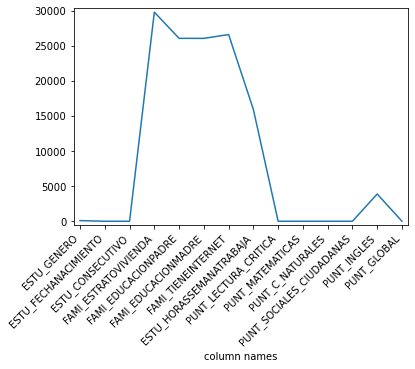

In [44]:
# Gráfico de valores nulos en la base de datos
null_df_20212A = df_20212A.apply(lambda x: sum(x.isnull())).to_frame(name= 'count')

plt.plot(null_df_20212A.index, null_df_20212A['count'])
plt.xticks(null_df_20212A.index, null_df_20212A.index, rotation=45,
horizontalalignment= 'right')
plt.xlabel('column names')
plt.margins(0.02)
plt.show()

Por el anterior dataframe, nos damos cuenta que las variables que hay 7 variables que contiene valores nulos. Sin embargo, antes de ajustar esto, explicaré el acercamiento individual que tendré con cada una individualmente.

  -  ESTU_GENERO: Crearé una segunda variable 'ESTU_GENERO_DUMMY' que tome valor 1 si es mujer y 0 si es hombre y a los valores faltantes, ingresar el valor de la mediana. 
  - ESTU_DEPTO_RESIDE: Esta variable permanecerá con los valores nulos.
  -  FAMI_ESTRATOVIVIENDA: Crearé una segunda variable a 'FAMI_ESTRATO_2' partir de esta, para volver esta variable a una categórica númerica, y a los valores faltantes, ingresar el valor de la mediana.
  -  FAMI_EDUCACIONPADRE: Crearé una segunda variable'FAMI_EDUPADRE_DUMMY' que tome valor 1 si tiene alguna educación formal y 0 si no tiene, ingresaré el valor de la mediana para lo n/a.
  -  FAMI_EDUCACIONMADRE: Crearé una segunda variable'FAMI_EDUPADRE_DUMMY' que tome valor 1 si tiene alguna educación formal y 0 si no tiene, ingresaré el valor de la mediana para lo n/a.
  -  ESTU_HORASSEMANATRABAJA: Crearé una segunda variable 'ESTU_TRABAJA' que tome valor 1 si trabaja cualquier hora y 0 si no trabaja o trabaja 0 horas. Reemplazaré los n/a con la mediana.
  -  PUNT_INGLES: Reemplazaré los n/a con la mediana.
  - FAMI_TIENEINTERNET: Crearé una segunda variable 'FAMI_TIENEINTERNET_DUMMY' que tome valor 1 si tiene internet y 0 si no, ingresaré el valor de la mediana para lo n/a.

**A. ESTU_GENERO**

In [45]:
# Creación de estu_genero_dummy
def ESTU_GEN_DUMMY(df_20212A):
    val = None   
    if df_20212A['ESTU_GENERO'] == 'F':
        val = 1
    elif df_20212A['ESTU_GENERO'] == 'M':
        val = 0     
    return val
df_20212A['ESTU_GENERO_DUMMY'] = df_20212A.apply(ESTU_GEN_DUMMY, axis=1)

# Reemplazo NaN por la mediana
df_20212A['ESTU_GENERO_DUMMY'] = df_20212A['ESTU_GENERO_DUMMY'].fillna(df_20212A['ESTU_GENERO_DUMMY'].median())

**B. FAMI_ESTRATOVIVIENDA**

In [46]:
# Creación de fami_estrato_2
def ESTRATO(df_20212A):
    
    val = None
    
    if df_20212A['FAMI_ESTRATOVIVIENDA'] == 'Estrato 1':
        val = 1
    elif df_20212A['FAMI_ESTRATOVIVIENDA'] == 'Estrato 2':
        val = 2
    elif df_20212A['FAMI_ESTRATOVIVIENDA'] == 'Estrato 3':
        val = 3
    elif df_20212A['FAMI_ESTRATOVIVIENDA'] == 'Estrato 4':
        val = 4
    elif df_20212A['FAMI_ESTRATOVIVIENDA'] == 'Estrato 5':
        val = 5
    elif df_20212A['FAMI_ESTRATOVIVIENDA'] == 'Estrato 6':
        val = 6
    elif df_20212A['FAMI_ESTRATOVIVIENDA'] == 'Sin Estrato':
        val = 999
    
    return val
        
df_20212A['FAMI_ESTRATO_2'] = df_20212A.apply(ESTRATO, axis=1)

# Reemplazo NaN por la mediana
df_20212A['FAMI_ESTRATO_2'] = df_20212A['FAMI_ESTRATO_2'].fillna(df_20212A['FAMI_ESTRATO_2'].median())

**C. FAMI_EDUCACIONPADRE**

In [47]:
# Creación de fami_edupadre_dummy
def EDUPADRE(df_20212A):
    
    val = None
    
    if (df_20212A['FAMI_EDUCACIONPADRE'] == 'Educación profesional completa') or (df_20212A['FAMI_EDUCACIONPADRE'] == 'Técnica o tecnológica completa') or (df_20212A['FAMI_EDUCACIONPADRE'] == 'Secundaria (Bachillerato) completa') or (df_20212A['FAMI_EDUCACIONPADRE'] == 'Primaria incompleta') or (df_20212A['FAMI_EDUCACIONPADRE'] == 'Secundaria (Bachillerato) incompleta') or (df_20212A['FAMI_EDUCACIONPADRE'] == 'Primaria completa') or  (df_20212A['FAMI_EDUCACIONPADRE'] == 'Educación profesional incompleta') or (df_20212A['FAMI_EDUCACIONPADRE'] == 'Postgrado') or (df_20212A['FAMI_EDUCACIONPADRE'] == 'Técnica o tecnológica incompleta'):
        val = 1 
    elif (df_20212A['FAMI_EDUCACIONPADRE'] == 'No sabe') or (df_20212A['FAMI_EDUCACIONPADRE'] == 'No Aplica') or (df_20212A['FAMI_EDUCACIONPADRE'] == 'Ninguno'):
        val = 0           
    return val 

df_20212A['FAMI_EDUPADRE_DUMMY'] = df_20212A.apply(EDUPADRE, axis=1)

# Reemplazo NaN por la mediana
df_20212A['FAMI_EDUPADRE_DUMMY'] = df_20212A['FAMI_EDUPADRE_DUMMY'].fillna(df_20212A['FAMI_EDUPADRE_DUMMY'].median())       

**D. FAMI_EDUCACIONMADRE**

In [48]:
# Creación fami_edumadre_dummy
def EDUMADRE(df_20212A):
    
    val = None
    
    if (df_20212A['FAMI_EDUCACIONMADRE'] == 'Educación profesional completa') or (df_20212A['FAMI_EDUCACIONMADRE'] == 'Técnica o tecnológica completa') or (df_20212A['FAMI_EDUCACIONMADRE'] == 'Secundaria (Bachillerato) completa') or (df_20212A['FAMI_EDUCACIONMADRE'] == 'Primaria incompleta') or (df_20212A['FAMI_EDUCACIONMADRE'] == 'Secundaria (Bachillerato) incompleta') or (df_20212A['FAMI_EDUCACIONMADRE'] == 'Primaria completa') or  (df_20212A['FAMI_EDUCACIONMADRE'] == 'Educación profesional incompleta') or (df_20212A['FAMI_EDUCACIONMADRE'] == 'Postgrado') or (df_20212A['FAMI_EDUCACIONMADRE'] == 'Técnica o tecnológica incompleta'):
        val = 1 
    elif (df_20212A['FAMI_EDUCACIONMADRE'] == 'No sabe') or (df_20212A['FAMI_EDUCACIONMADRE'] == 'No Aplica') or (df_20212A['FAMI_EDUCACIONMADRE'] == 'Ninguno'):
        val = 0           
    return val 

df_20212A['FAMI_EDUMADRE_DUMMY'] = df_20212A.apply(EDUMADRE, axis=1)

# Reemplazo NaN por la mediana
df_20212A['FAMI_EDUMADRE_DUMMY'] = df_20212A['FAMI_EDUMADRE_DUMMY'].fillna(df_20212A['FAMI_EDUMADRE_DUMMY'].median())       

**E. ESTU_HORASSEMANATRABAJA**

In [49]:
# Creación de estu_trabaja
def TRABAJA(df_20212A): 
    val = None 
    if (df_20212A['ESTU_HORASSEMANATRABAJA'] == 'Menos de 10 horas') or (df_20212A['ESTU_HORASSEMANATRABAJA'] == 'Más de 30 horas') or (df_20212A['ESTU_HORASSEMANATRABAJA'] == 'Entre 21 y 30 horas') or (df_20212A['ESTU_HORASSEMANATRABAJA'] == 'Entre 11 y 20 horas'):
        val = 1
    elif (df_20212A['ESTU_HORASSEMANATRABAJA'] == '0'):
        val = 0 
    return val 

df_20212A['ESTU_TRABAJA'] = df_20212A.apply(TRABAJA, axis=1)

# Reemplazo NaN por la mediana
df_20212A['ESTU_TRABAJA'] = df_20212A['ESTU_TRABAJA'].fillna(df_20212A['ESTU_TRABAJA'].median())  

**F. PUNT_INGLES**

In [50]:
# Reemplazo NaN por la mediana
df_20212A['PUNT_INGLES'] = df_20212A['PUNT_INGLES'].fillna(df_20212A['PUNT_INGLES'].median())

**G. FAMI_TIENEINTERNET**

In [51]:
# Creación de fami_tieneinternet_dummy
def INTERNET(df_20212A): 
    val = None 
    if df_20212A['FAMI_TIENEINTERNET'] == 'Si':
        val = 1
    elif df_20212A['FAMI_TIENEINTERNET'] == 'No':
        val = 0 
    return val 

df_20212A['FAMI_TIENEINTERNET_DUMMY'] = df_20212A.apply(INTERNET, axis=1)

# Reemplazo NaN por la mediana
df_20212A['FAMI_TIENEINTERNET_DUMMY'] = df_20212A['FAMI_TIENEINTERNET_DUMMY'].fillna(df_20212A['FAMI_TIENEINTERNET_DUMMY'].median())  

_**Creación de variable edad - Limpieza de ESTU_FECHANACIMIENTO**_:

Al intentar cambiar el tipo a datetime, nos encontramos con un error, procedemos un proceso para saber cuáles son las fechas con complicaciones y las arreglamos manualmente.

In [52]:
# Convertir object a dateformat tiene un error, creo ESTU_FECHA2 para ver las fechas que tienen complicaciones
df_20212A['ESTU_FECHA2'] =  pd.to_datetime(df_20212A['ESTU_FECHANACIMIENTO'], format = '%d/%m/%Y', errors='coerce')

# Exploro la lista de fechas con complicaciones y encuentro que hay un 0 donde debería haber un 2. 
df_20212A[df_20212A['ESTU_FECHA2'].isna()]

,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_CONSECUTIVO,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,ESTU_HORASSEMANATRABAJA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,...,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_GENERO_DUMMY,FAMI_ESTRATO_2,FAMI_EDUPADRE_DUMMY,FAMI_EDUMADRE_DUMMY,ESTU_TRABAJA,FAMI_TIENEINTERNET_DUMMY,ESTU_FECHA2
74726,M,12/07/0003,SB11202140003548,Estrato 6,Postgrado,Educación profesional completa,Si,Menos de 10 horas,72,75,...,72,100.0,378,0.0,6.0,1.0,1.0,1.0,1.0,NaT
82177,M,25/09/0004,SB11202140408080,Estrato 2,Educación profesional completa,Educación profesional incompleta,Si,0,55,56,...,54,59.0,273,0.0,2.0,1.0,1.0,0.0,1.0,NaT
113820,F,23/12/0004,SB11202140322158,Estrato 5,Postgrado,Educación profesional completa,Si,0,67,65,...,60,59.0,322,1.0,5.0,1.0,1.0,0.0,1.0,NaT
120991,M,29/06/0004,SB11202140036746,Estrato 6,Postgrado,Postgrado,Si,0,67,74,...,69,76.0,348,0.0,6.0,1.0,1.0,0.0,1.0,NaT
123072,M,08/11/0003,SB11202140311831,Estrato 4,Secundaria (Bachillerato) incompleta,Educación profesional completa,Si,Menos de 10 horas,52,45,...,40,61.0,230,0.0,4.0,1.0,1.0,1.0,1.0,NaT
130227,M,07/04/0004,SB11202140003663,Estrato 6,Educación profesional completa,Postgrado,Si,0,72,66,...,69,82.0,338,0.0,6.0,1.0,1.0,0.0,1.0,NaT
181091,F,09/05/0003,SB11202140004259,Estrato 4,No sabe,Educación profesional completa,Si,0,73,74,...,71,100.0,381,1.0,4.0,0.0,1.0,0.0,1.0,NaT
188722,M,13/01/0003,SB11202140427494,Estrato 2,Técnica o tecnológica completa,Técnica o tecnológica completa,Si,0,67,34,...,77,61.0,290,0.0,2.0,1.0,1.0,0.0,1.0,NaT
198994,M,18/12/0002,SB11202140167461,Estrato 6,Postgrado,Postgrado,Si,Menos de 10 horas,66,73,...,63,76.0,336,0.0,6.0,1.0,1.0,1.0,1.0,NaT


In [53]:
# Limpio manualmente los errors de digitación
df_20212A['ESTU_FECHANACIMIENTO'] = df_20212A['ESTU_FECHANACIMIENTO'].replace(['12/07/0003'],'12/17/2003')
df_20212A['ESTU_FECHANACIMIENTO'] = df_20212A['ESTU_FECHANACIMIENTO'].replace(['25/09/0004'],'25/09/2004')
df_20212A['ESTU_FECHANACIMIENTO'] = df_20212A['ESTU_FECHANACIMIENTO'].replace(['23/12/0004'],'23/12/2004')
df_20212A['ESTU_FECHANACIMIENTO'] = df_20212A['ESTU_FECHANACIMIENTO'].replace(['29/06/0004'],'29/06/2004')
df_20212A['ESTU_FECHANACIMIENTO'] = df_20212A['ESTU_FECHANACIMIENTO'].replace(['08/11/0003'],'08/11/2003')
df_20212A['ESTU_FECHANACIMIENTO'] = df_20212A['ESTU_FECHANACIMIENTO'].replace(['07/04/0004'],'07/04/2004')
df_20212A['ESTU_FECHANACIMIENTO'] = df_20212A['ESTU_FECHANACIMIENTO'].replace(['09/05/0003'],'09/05/2003')
df_20212A['ESTU_FECHANACIMIENTO'] = df_20212A['ESTU_FECHANACIMIENTO'].replace(['13/01/0003'],'13/01/2003')
df_20212A['ESTU_FECHANACIMIENTO'] = df_20212A['ESTU_FECHANACIMIENTO'].replace(['18/12/0002'],'18/12/2002')
df_20212A['ESTU_FECHANACIMIENTO'] = df_20212A['ESTU_FECHANACIMIENTO'].replace(['12/17/2003'],'17/12/2003')

In [54]:
# Convierto de object a dateformat
df_20212A['ESTU_FECHANACIMIENTO'] =  pd.to_datetime(df_20212A['ESTU_FECHANACIMIENTO'], format = '%d/%m/%Y')

# Extraigo el año 
df_20212A['ANO_NACIMIENTO'] = df_20212A['ESTU_FECHANACIMIENTO'].dt.year

# Var para el año de identificar HOY
today = date.today().year

# Calculo edad al día de hoy
df_20212A['EDAD'] = today - df_20212A['ANO_NACIMIENTO']

Para poder identificar esta base de datos al momento de hacer el append para consolidar mi base master, creo una nueva columna de identificación:

In [55]:
df_20212A['BASE_ID'] = 'Saber11_20212'

### 1.3 Consolidación y caracterización de la base de datos master

Realizo el método _append_ para unir las bases de la prueba Saber 11 para los periodos del 20192, 20202 y 20212. La base master nos da un esquema de 1,584,063 entradas por 23 columnas. Lo anterior, significa que entre los tres años en el segundo periodo, tenemos una muestra de 1,584,063 estudiantes encuestados de sus características sociodemográficas a través de la prueba Saber 11. 

In [56]:
# Append a la base del 20192 con la base del 20202

df_2019_2020 = df_20192A.append(df_20202A, ignore_index=True)

# Append la base unida del 20192 y 20202 con la de 20212
master_db = df_2019_2020.append(df_20212A, ignore_index=True)

master_db.set_index('ESTU_CONSECUTIVO')

,ESTU_GENERO,ESTU_FECHANACIMIENTO,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_HORASSEMANATRABAJA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,...,ESTU_GENERO_DUMMY,FAMI_ESTRATO_2,FAMI_EDUPADRE_DUMMY,FAMI_EDUMADRE_DUMMY,ESTU_TRABAJA,FAMI_TIENEINTERNET_DUMMY,ANO_NACIMIENTO,EDAD,BASE_ID,ESTU_FECHA2
ESTU_CONSECUTIVO,,,,,,,,,,,,,,,,,,,,,
SB11201940031558,M,2002-02-18,Estrato 3,Si,Educación profesional completa,Secundaria (Bachillerato) completa,Menos de 10 horas,47,48,37,...,0.0,3.0,1.0,1.0,1.0,1.0,2002,20,Saber11_20192,NaT
SB11201940469859,F,2003-01-24,NaN,NaN,NaN,NaN,0,61,41,60,...,1.0,2.0,1.0,1.0,0.0,1.0,2003,19,Saber11_20192,NaT
SB11201940303339,M,2003-06-28,Estrato 3,Si,Técnica o tecnológica completa,Técnica o tecnológica completa,Menos de 10 horas,60,65,54,...,0.0,3.0,1.0,1.0,1.0,1.0,2003,19,Saber11_20192,NaT
SB11201940255017,M,2001-06-02,Estrato 1,No,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,0,66,57,41,...,0.0,1.0,1.0,1.0,0.0,0.0,2001,21,Saber11_20192,NaT
SB11201940154799,M,2002-04-26,Estrato 3,No,Primaria incompleta,Secundaria (Bachillerato) completa,Más de 30 horas,62,54,61,...,0.0,3.0,1.0,1.0,1.0,0.0,2002,20,Saber11_20192,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SB11202140640990,M,2000-09-06,Estrato 2,Si,Primaria completa,Educación profesional completa,0,31,30,41,...,0.0,2.0,1.0,1.0,0.0,1.0,2000,22,Saber11_20212,2000-09-06
SB11202140626437,M,2000-04-19,Estrato 4,Si,Ninguno,Primaria incompleta,Menos de 10 horas,37,35,33,...,0.0,4.0,0.0,1.0,1.0,1.0,2000,22,Saber11_20212,2000-04-19
SB11202140639119,M,2003-11-20,Estrato 1,No,Primaria incompleta,Educación profesional incompleta,0,55,47,47,...,0.0,1.0,1.0,1.0,0.0,0.0,2003,19,Saber11_20212,2003-11-20


Hago una revisión de los tipos de variables para corroborar que todo se encuentre en orden para poder seguir a la siguiente fase:

In [57]:
master_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584063 entries, 0 to 1584062
Data columns (total 24 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   ESTU_GENERO               1583857 non-null  object        
 1   ESTU_FECHANACIMIENTO      1584063 non-null  datetime64[ns]
 2   ESTU_CONSECUTIVO          1584063 non-null  object        
 3   FAMI_ESTRATOVIVIENDA      1502805 non-null  object        
 4   FAMI_TIENEINTERNET        1512815 non-null  object        
 5   FAMI_EDUCACIONPADRE       1514476 non-null  object        
 6   FAMI_EDUCACIONMADRE       1514146 non-null  object        
 7   ESTU_HORASSEMANATRABAJA   1534260 non-null  object        
 8   PUNT_LECTURA_CRITICA      1584063 non-null  int64         
 9   PUNT_MATEMATICAS          1584063 non-null  int64         
 10  PUNT_C_NATURALES          1584063 non-null  int64         
 11  PUNT_SOCIALES_CIUDADANAS  1584063 non-null  int64 

Exploro si hay valores nulos de las variables relevantes que fueron creadas para continuar con el análisis:

In [58]:
percent_missing_masterdb = master_db.isnull().sum() * 100 / len(master_db)
missing_value_masterdb = pd.DataFrame({'column_name': master_db.columns,
                                 'percent_missing': percent_missing_masterdb})

missing_value_masterdb.set_index('column_name')

,percent_missing
column_name,
ESTU_GENERO,0.013005
ESTU_FECHANACIMIENTO,0.000000
ESTU_CONSECUTIVO,0.000000
FAMI_ESTRATOVIVIENDA,5.129720
FAMI_TIENEINTERNET,4.497801
FAMI_EDUCACIONPADRE,4.392944
FAMI_EDUCACIONMADRE,4.413776
ESTU_HORASSEMANATRABAJA,3.144004
PUNT_LECTURA_CRITICA,0.000000


# Fase 2: identificar características y relaciones en las variables

## 2.1. Identificación de estadísticas descriptivas de la muestra

### 2.1.1. Tablas descriptivas

Con el fin de hacer un correcto reporte de estadísticas descriptivas, se tomara una aproximación distinta por tipo de variable en la muestra: . A continuación expondré inidividualmente los métodos a seguir:

   - _Variables númericas_: Para las variables númericas en la muestra master (Puntajes de Lectura Crítica, Matemáticas, Inglés, Ciencias Naturales, Sociales y Ciudadanas, Inglés y edad) se expondrá una tabla de estadísticas descriptivas que permitan entender la distribución y caracterización básica de este subconjunto. 
       - Análisis para la base master y la división entre los años escogidos
   - _Variables categóricas_: Planteo un acercamiento de conteo para ver la proporción que hay en la muestra por cada categoría.
       - Análisis para la base master y la división entre los años escogidos
       
        
    

**A. Variables númericas**: Por medio del método de describe, escojo el subconjunto de variables númericas para exponer cuantas observaciones hay de cada una en la base, su promedio, desviación estandar, valor mínimo y máximo y el 25%, 50% y 75%.

   **A.1. Análisis para toda la muestra**

In [59]:
estad_descrip = master_db[['PUNT_LECTURA_CRITICA',
                           'PUNT_MATEMATICAS',
                           'PUNT_C_NATURALES',
                           'PUNT_SOCIALES_CIUDADANAS',
                           'PUNT_INGLES',
                           'PUNT_GLOBAL',
                           'EDAD']]

estad_descrip.describe().applymap('{:,.2f}'.format)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,EDAD
count,"1,584,063.00","1,584,063.00","1,584,063.00","1,584,063.00","1,584,063.00","1,584,063.00","1,584,063.00"
mean,52.22,50.42,48.19,47.05,48.12,246.82,19.82
std,10.45,11.77,10.45,12.09,12.29,50.29,4.77
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,45.00,42.00,40.00,38.00,39.00,208.00,18.00
50%,52.00,50.00,48.00,46.00,47.00,243.00,19.00
75%,60.00,58.00,55.00,56.00,55.00,282.00,20.00
max,100.00,100.00,100.00,100.00,100.00,500.00,122.00


**A.2. Análisis por periodo**

In [60]:
estadperiodo = master_db.groupby('BASE_ID').agg({'PUNT_LECTURA_CRITICA': ['mean', 'median', 'min', 'max', 'std'], 
                                                 'PUNT_MATEMATICAS': ['mean', 'median', 'min', 'max', 'std'],
                                                 'PUNT_C_NATURALES': ['mean', 'median', 'min', 'max', 'std'],
                                                 'PUNT_SOCIALES_CIUDADANAS': ['mean', 'median', 'min', 'max', 'std'],
                                                 'PUNT_INGLES': ['mean', 'median', 'min', 'max', 'std'],
                                                 'PUNT_GLOBAL': ['mean', 'median', 'min', 'max', 'std'],
                                                 'EDAD': ['mean', 'median', 'min', 'max', 'std'],                                           
                                                  })
estadperiodo

PUNT_LECTURA_CRITICA                             \
                              mean median min  max        std   
BASE_ID                                                         
Saber11_20192            52.157305     52   0  100  10.537963   
Saber11_20202            52.156784     52   0  100  10.158427   
Saber11_20212            52.334199     52   0  100  10.623624   

              PUNT_MATEMATICAS                             ... PUNT_GLOBAL  \
                          mean median min  max        std  ...        mean   
BASE_ID                                                    ...               
Saber11_20192        50.606349     51   0  100  11.997649  ...  246.186464   
Saber11_20202        51.019754     51   0  100  11.647657  ...  248.347102   
Saber11_20212        49.666874     50   0  100  11.605103  ...  246.024008   

                                               EDAD                            
              median min  max        std       mean median min  max       std  
BASE_ID                                                                        
Saber11_20192    243   0  477  51.386858  21.201235     20   3  122  6.834121  
Saber11_20202    245   0  500  48.692523  19.595040     19   2  122  2.916352  
Saber11_20212    242   0  494  50.623078  18.609602     18   1  122  2.862498  

[3 rows x 35 columns]

**B. Variables Categorícas**

**Género:** 
  - Master database: Podemos ver que para el conjunto de la muestra recogido a lo largo de los periodos, la muestra se encuentra constituida por mayoritariamente mujeres que por hombres.
  - Género por periodo: De igual forma, vemos que dividiendo por periodos, sigue la tendencia de tener mayor número de estudiantes mujeres que estudiantes hombres.

In [61]:
genero_periodo = master_db.groupby(['BASE_ID', 'ESTU_GENERO'])['ESTU_GENERO'].size()
print(genero_periodo)

genero_master = master_db.groupby('ESTU_GENERO')['ESTU_GENERO'].size()
print(genero_master)

BASE_ID        ESTU_GENERO
Saber11_20192  F              296008
               M              250098
Saber11_20202  F              276572
               M              228292
Saber11_20212  F              291037
               M              241850
Name: ESTU_GENERO, dtype: int64
ESTU_GENERO
F    863617
M    720240
Name: ESTU_GENERO, dtype: int64


**Estrato de Vivienda**:
   - Master database: Vemos que para la muestra escogida el estrato 2 es el estrato más concurrido entre la muestra de estudiantes, seguido por el estrato 1 y el estrato 3. 
   - Periodo: De igual forma, por periodo, podemos ver que hay una tendencia similar, el estrato 2 sigue siendo el mayor estrato entre los periodos.

In [62]:
estrato_periodo = master_db.groupby(['BASE_ID', 'FAMI_ESTRATO_2'])['FAMI_ESTRATO_2'].size()
print(estrato_periodo)

estrato_master = master_db.groupby(['FAMI_ESTRATO_2'])['FAMI_ESTRATO_2'].size()
print(estrato_master)

BASE_ID        FAMI_ESTRATO_2
Saber11_20192  1.0               159977
               2.0               222821
               3.0               108692
               4.0                25810
               5.0                 8024
               6.0                 3711
               999.0              17177
Saber11_20202  1.0               152852
               2.0               199274
               3.0               103550
               4.0                23463
               5.0                 7019
               6.0                 3083
               999.0              15631
Saber11_20212  1.0               148241
               2.0               215933
               3.0               111118
               4.0                27424
               5.0                 8084
               6.0                 3872
               999.0              18307
Name: FAMI_ESTRATO_2, dtype: int64
FAMI_ESTRATO_2
1.0      461070
2.0      638028
3.0      323360
4.0       76697
5.0       23127


**Estudiante Trabaja**

   - Master database: Hay mayor número de estudiantes que no trabajan que estudiantes que trabajan en la muestra.
   - Periodo: De igual forma, por periodo, podemos ver que hay una tendencia similar, hay mayor número de estudiantes que no trabajan. 

In [63]:
trabaja_periodo = master_db.groupby(['BASE_ID', 'ESTU_TRABAJA'])['ESTU_TRABAJA'].size()
print(trabaja_periodo)


trabaja_master = master_db.groupby(['ESTU_TRABAJA'])['ESTU_TRABAJA'].size()
print(trabaja_master)

BASE_ID        ESTU_TRABAJA
Saber11_20192  0.0             371393
               1.0             174819
Saber11_20202  0.0             310811
               1.0             194061
Saber11_20212  0.0             331469
               1.0             201510
Name: ESTU_TRABAJA, dtype: int64
ESTU_TRABAJA
0.0    1013673
1.0     570390
Name: ESTU_TRABAJA, dtype: int64


### 2.1.2 Aplicación de visualizaciones para estadísticas descriptivas

Histograma para todas las columnas del dataframe:

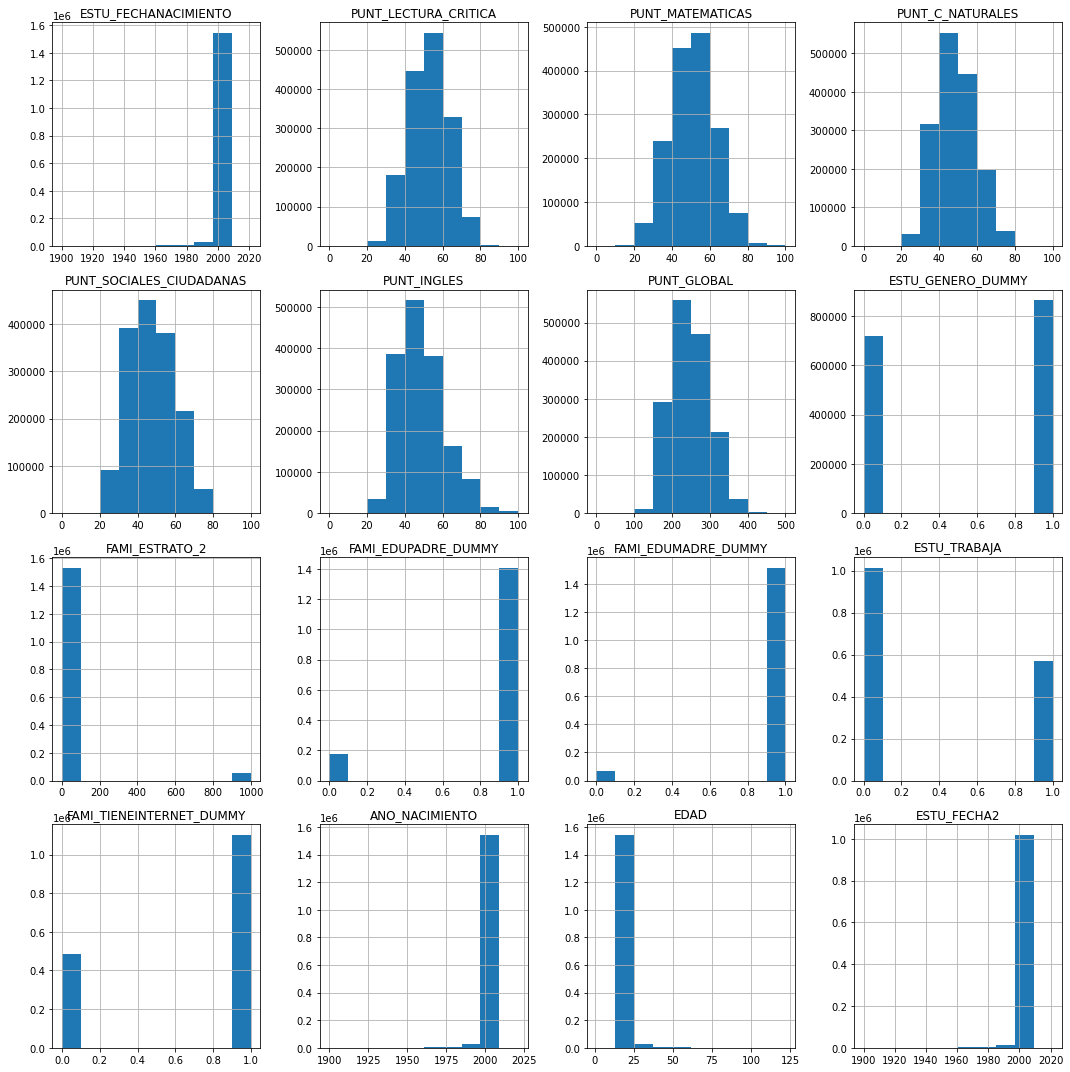

In [64]:
master_db.hist(figsize=(15,15))
plt.tight_layout()

**Edad según género en la base de datos:** Podemos ver que hay una distribución similar entre la edad y el género en la muestra. Es decir, tanto mujeres como hombres se encuentran en promedio, igualmente representados en la muestra.

<AxesSubplot:xlabel='EDAD', ylabel='ESTU_GENERO'>

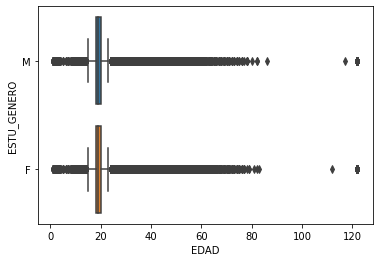

In [65]:
sns.boxplot(x="EDAD", y="ESTU_GENERO", data = master_db)

**Estrato de los estudiantes en la muestra:** Podemos ver que con respecto a la representación de los estratos de vivienda por estudiantes, el estrato en el que mayoritariamente los estudiantes pertenecen es el estrato 2. 

[Text(0, 0, 'Estrato 1'),
 Text(1, 0, 'Estrato 2'),
 Text(2, 0, 'Estrato 3'),
 Text(3, 0, 'Estrato 4'),
 Text(4, 0, 'Estrato 5'),
 Text(5, 0, 'Estrato 6'),
 Text(6, 0, 'No Aplica')]

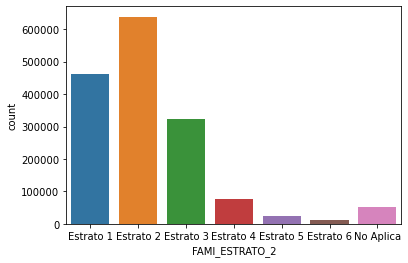

In [66]:
estrato_graph = sns.countplot(x='FAMI_ESTRATO_2', data=master_db)
estrato_graph.set_xticklabels(['Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6', 'No Aplica'])

**Proporción de los estudiantes que trabajan vs. no trabajan en la muestra:**

[Text(0, 0, 'No'), Text(1, 0, 'Sí')]

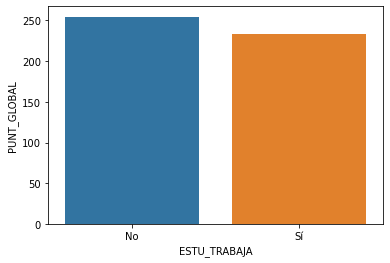

In [67]:
trabaja_graph = sns.barplot(x='ESTU_TRABAJA', y='PUNT_GLOBAL', data=master_db)
trabaja_graph.set_xticklabels(['No', 'Sí'])

## 2.2. Relación entre variables

**Exposición de correlación y gráfica de correlación entre submuestra**

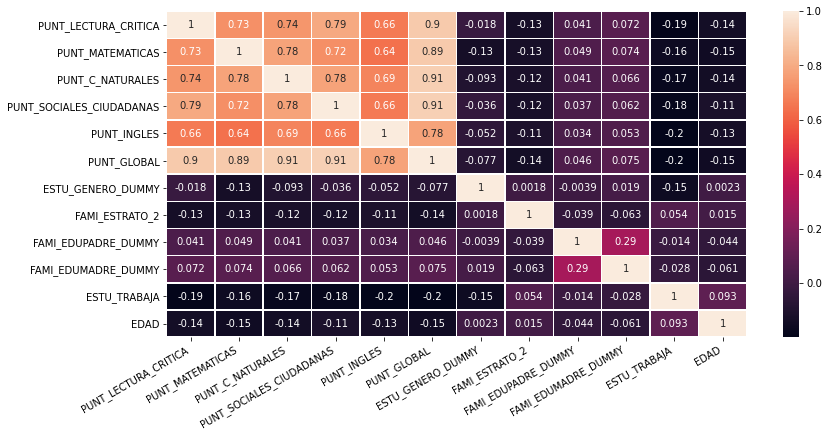

In [68]:
master_db_2 = master_db[['PUNT_LECTURA_CRITICA',
                        'PUNT_MATEMATICAS',
                        'PUNT_C_NATURALES',
                        'PUNT_SOCIALES_CIUDADANAS',
                        'PUNT_INGLES',
                        'PUNT_GLOBAL',
                        'ESTU_GENERO_DUMMY',
                        'FAMI_ESTRATO_2',
                        'FAMI_EDUPADRE_DUMMY',
                        'FAMI_EDUMADRE_DUMMY',
                        'ESTU_TRABAJA',
                        'EDAD',
                        'BASE_ID']]

corrmat = master_db_2.corr()

plt.figure(figsize=(13, 6))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

**Relación del Puntaje Global y tener internet o no:** Podemos ver que el promedio del desempeño en la Prueba Saber 11, en términos de Puntaje global, es más alto en los estudiantes que tienen internet que los que no tienen internet.

[Text(0, 0, 'No'), Text(1, 0, 'Sí')]

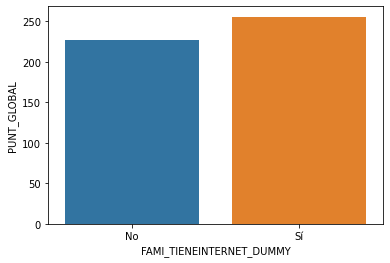

In [69]:
puntglob_internet = sns.barplot(data=master_db, x="FAMI_TIENEINTERNET_DUMMY", y="PUNT_GLOBAL")
puntglob_internet.set_xticklabels(['No', 'Sí'])

**Relación entre el género del estudiante y el puntaje global**: Por medio de esta gráfica podemos ver que, visualmente, no hay una diferencia entre el desempeño de puntaje global promedio entre hombres y mujeres.

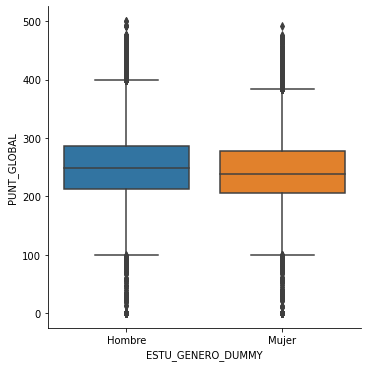

In [70]:
ax = sns.catplot(x="ESTU_GENERO_DUMMY", y="PUNT_GLOBAL", data=master_db, kind='box')
ax.set_xticklabels(['Hombre', 'Mujer'])

**Relación entre trabajar y pertenencer a un estrato de vivienda y el resultado del puntaje global:** Podemos ver que los estratos que en promedio tienen mayor desempeño en puntaje global son el estrato 3 y 4, de los cuales, se destacan mayoritariamente los estudiantes que no trabajan.

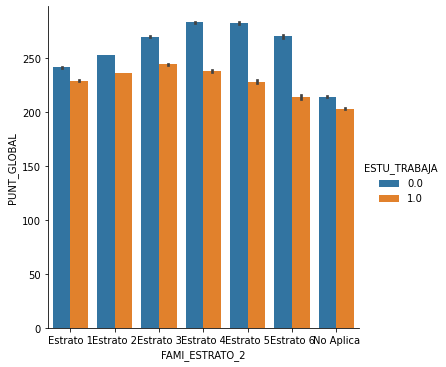

In [71]:
traba_estrato_punt = sns.catplot(data=master_db, x="FAMI_ESTRATO_2", y="PUNT_GLOBAL", hue="ESTU_TRABAJA", kind="bar")
traba_estrato_punt.set_xticklabels(['Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6', 'No Aplica'])

**Relación entre tener o no internet con puntaje global por estrato:** Por medio de la gráfica, podemos inferir que los estudiantes que tienen internet tienden a tener mejor desempeño en promedio del puntaje global. Así mismo, viendo este análisis por estrato, es el estrato 6 el que mayor promedio de desempeño tiene entre los que tienen internet. 

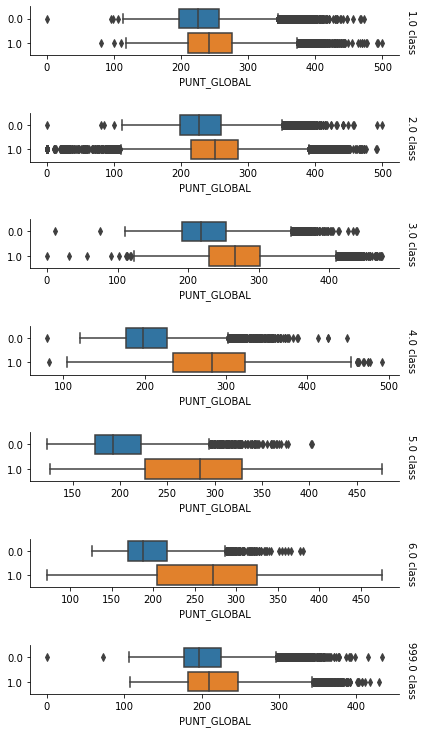

In [72]:
g = sns.catplot(
    data=master_db,
    x="PUNT_GLOBAL", y="FAMI_TIENEINTERNET_DUMMY", row="FAMI_ESTRATO_2",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="PUNT_GLOBAL", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('{x:.0f}')

## 2.3. Conclusiones principales de la identificación de características y relaciones en las variables de la muestra

**_Patrones encontrados en la exploración_**:
Se evidenciaron diferentes patrones interesantes por medio de la exploración. En principio, aquellos estudiantes que tienen internet, evidencian tener en promedio mejores resultados en su promedio global. Así mismo, los estudiantes que reportan no trabajar, tienen mejor desempeño, en promedio, en sus resultados de promedio global. 



**_Impacto de variables sociodemográficas_**:
Después de realizar diferentes métodos de exploración de análisis de datos, es posible ver que, entre el subconjunto seleccionado, las variables que más impacto tienen sobre el desempeño del puntaje global de los estudiantes son: si tiene o no internet, el estrato de vivienda y si el estudiante trabaja o no. Por otro lado, encontramos que no parece haber una diferencia significativa entre el promedio del desempeño del puntaje global entre mujeres y hombres.

A continuación, considerando que por mejor captura del desempeño en la prueba, hacemos un ajuste al subconjunto de la muestra que consideramos para seguir a la próxima fase: 

In [73]:
modelo_db = master_db[['PUNT_GLOBAL',
                       'ESTU_GENERO_DUMMY',
                       'FAMI_ESTRATO_2',
                       'FAMI_EDUPADRE_DUMMY',
                       'FAMI_EDUMADRE_DUMMY',
                       'ESTU_TRABAJA',
                       'FAMI_TIENEINTERNET_DUMMY',
                       'EDAD']]

## Selecciono esta base para más adelante
modelo_db_log = master_db[['PUNT_GLOBAL',
                       'PUNT_LECTURA_CRITICA',
                       'PUNT_MATEMATICAS',
                       'PUNT_C_NATURALES',
                       'PUNT_SOCIALES_CIUDADANAS',
                       'PUNT_INGLES',
                       'ESTU_GENERO_DUMMY',
                       'FAMI_ESTRATO_2',
                       'FAMI_EDUPADRE_DUMMY',
                       'FAMI_EDUMADRE_DUMMY',
                       'ESTU_TRABAJA',
                       'FAMI_TIENEINTERNET_DUMMY',
                       'EDAD']]

# Fase 3: abordar relación variables-desempeño a través de un modelo

## 3.1. Modelo de Regresión Lineal
Planteamos un modelo de regresión lineal que busca relacionar significativamente el desempeño del puntaje global de la Prueba Saber 11 con variables sociodemográficas del estudiante como lo son: el género, el estrato, la educación de padre y madre, si trabaja, si tiene internet y su edad. 

### 3.1.1. Estimación mediante regresión lineal con Statsmodels

**Preparación de X y Y**

In [74]:
# Establezco mi variable dependiente como la puntuación global de la prueba
y = modelo_db['PUNT_GLOBAL']

# Establezco mis variables independientes como todas las columnas de mi subconjunto de muestra 'modelo_db', exceptuando mi variable dependiente
X = modelo_db.copy()
X.drop(['PUNT_GLOBAL'], axis=1, inplace=True)

# Fijo mi intercepto de la recta de regresión
X = sm.add_constant(X)

**Ajuste de modelo**

In [75]:
# Creo objeto que representa mi modelo que utilice Minimos Cuadrados Ordinarios 
modelo = sm.OLS(y, X)

# Utilizo el método fit para poner en marcha el proceso de ajuste para encontrar los coeficientes que mejor se ajusten a los datos
resultado = modelo.fit()

**Presentación de resultados**

In [76]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                 3.414e+04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:25:48   Log-Likelihood:            -8.3426e+06
No. Observations:             1584063   AIC:                         1.669e+07
Df Residuals:                 1584055   BIC:                         1.669e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      256.3749      0.263    975.668      0.000     255.860     256.890
ESTU_GENERO_DUMMY           -9.5815      0.076   -126.276      0.000      -9.730      -9.433
FAMI_ESTRATO_2              -0.0267      0.000   -124.478      0.000      -0.027      -0.026
FAMI_EDUPADRE_DUMMY          1.8470      0.124     14.849      0.000       1.603       2.091
FAMI_EDUMADRE_DUMMY         10.2072      0.192     53.125      0.000       9.831      10.584
ESTU_TRABAJA               -17.3665      0.080   -217.567      0.000     -17.523     -17.210
FAMI_TIENEINTERNET_DUMMY    23.2480      0.083    280.078      0.000      23.085      23.411
EDAD                        -1.2480      0.008   -158.590      0.000      -1.263      -1.233
==============================================================================
Omnibus:                    17186.460   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17584.031
Skew:                           0.252   Prob(JB):                         0.00
Kurtosis:                       2.886   Cond. No.                     1.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.1.2. Conclusiones del modelo de Regresión Lineal
El R-Squared del modelo nos indica que no es un modelo que se pueda considerar 'reliable' ya que el valor del R-Squared es menor a 0.95.

### 3.2.1. Estimación mediante regresión lineal con Scikit Learn 

**Preparación de X y y**: Considerando que en el anterior punto ya definimos la nuestra variable dependiente y nuestras variables independientes, nos saltaremos este punto.

**Entrenamiento:**

In [77]:
# Separación de las observaciones entre aquella para entrenar el modelo otra probar desempeño.
# Establezco tamaño de conjunto de prueba al 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Defino objeto que representa mi modelo
modelo_2 = linear_model.LinearRegression()

# Sobre el objeto aplico el método fit para entrenar el modelo pasando parametro mis X y Y
modelo_2.fit( X_train.values, y_train.values)

# Recupero el valor del intercepto, pendientes de la recta que mejor se ajustaron a mis datos
print('Coefficients:\n \t \t' + str(modelo_2.intercept_) + '\t' + str(modelo_2.coef_))

Coefficients:
 	 	256.55101242215346	[  0.          -9.57616554  -0.02667988   1.77737415  10.14120653
 -17.39668811  23.26372502  -1.24936744]


**Prueba:** Eligo como métricas el Error cuadrático medio y el R cuadrado

In [78]:
y_pred = modelo_2.predict ( X_test.values)

print('Error cuadrático medio: \t%.2f'% mean_squared_error(y_test, y_pred))
print('R cuadrado: \t\t\t%.2f'% r2_score(y_test, y_pred))

Error cuadrático medio: 	2198.02
R cuadrado: 			0.13


### 3.1.2. Conclusiones del modelo de Regresión Lineal
El R-Squared del modelo nos indica que no es un modelo que se pueda considerar 'reliable' ya que el valor del R-Squared es menor a 0.95. Por medio del error cuarático medio, podemos ver que no están agrupados o están muy dispersos, y posiblemente no sirvan para modelar el comportamiento. Así mismo, si sacamos la raíz podemos ver que un margen de error bastante alto con respecto a los datos reales.




## 3.2. Modelo de Regresión Logística
Por medio de este modelo de regresión logística, deseo explorar la probabilidad de que Padre del estudiante haya tenido educación formal dado su desempeño en su puntaje de lectura crítica, matematícas, ciencias naturales, sociales e ingés. 

**Definición de variables:**

In [79]:
# Variables independientes
X = modelo_db_log[['PUNT_LECTURA_CRITICA',
                   'PUNT_MATEMATICAS',
                   'PUNT_C_NATURALES',
                   'PUNT_SOCIALES_CIUDADANAS',
                   'PUNT_INGLES']]

# Variable dependiente
y = modelo_db_log['FAMI_EDUPADRE_DUMMY']

**Creación del modelo:**

In [80]:
# Creamos conjuntos de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Declaramos una instancia del modelo
lr = LogisticRegression()

# Entrenamos el modelo
lr.fit(X_train, y_train)

# Utilizamos el modelo para predecir
y_pred = lr.predict(X_test)

**Verifico la precisión del modelo:**

In [81]:
lr.score(X_test, y_test)

0.8900992067876002

### 3.2.1. Conclusiones del modelo de regresión logística
El modelo acierta más del 60% de las veces. Esto, señala que es probable que estás variables sean pertinentes al momento de predecir si el estudiante tiene un papá con educación formal dependiendo de su desempeño en las diferentes áreas. Sin embargo, se deben tener en cuenta más variables en el modelo para aumentar su precisión.

# Fase 4: Desarrollar una herramienta interactiva de análisis
Para el desarrollo de la fase 4, escogí desarrollar **dos** herramientas que me permitan profundizar en los análisis presentados para la fase 2 que representen: análisis de la muestra y análisis de la relación entre variables.

## Herramienta I: Desempeño del promedio del puntaje global por categoría

Creación de barplot que visualice el desempeño en promedio del puntaje global con las diferentes categorías disponibles en la muestra. Este gráfico permite al usuario explorar diferentes preguntas sobre la caracterización sociodemográfica de los estudiantes que presentaron la prueba Saber 11 y a su vez, relacionarlas con el puntaje promedio global. Algunas preguntas que el usuario puede responder, son:

   1. ¿Cómo cambia el comportamiento del Puntaje Global por Estrato cuando veo la división entre género?
   2. ¿Cómo es el desempeño en promedio de los estudiantes que trabajan cuando veo la división entre género?
   3. ¿Cómo es el desempeño en promedio de los estudiantes por estrato cuando veo la división laboral entre los estudiantes?

In [82]:
categorical_column = [column for column in master_db.columns if master_db[column].dtype == 'object']
categorical_column

['ESTU_GENERO',
 'ESTU_CONSECUTIVO',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_TIENEINTERNET',
 'FAMI_EDUCACIONPADRE',
 'FAMI_EDUCACIONMADRE',
 'ESTU_HORASSEMANATRABAJA',
 'BASE_ID']

In [83]:
dd1 = widgets.Dropdown(
    options = categorical_column,
    value = categorical_column[0],
    description = 'Selecciona una característica:'
)

dd2 = widgets.Dropdown(
    options = categorical_column,
    value = categorical_column[0],
    description = 'Hue:'
)

ui = widgets.HBox([dd1, dd2])

def draw_countplot(column, hue):
    p = sns.barplot(data = master_db, x=column, y=master_db['PUNT_GLOBAL'], hue=hue)
    if len(master_db[column].unique()) > 4:
        p.tick_params(axis='x', rotation=90)
        
out = widgets.interactive_output(draw_countplot, {'column': dd1, 'hue': dd2})
display(ui, out)

Output()

## Herramienta II: Caracterización de la muestra
Creación de countplot que visualice la dimensión de categoría escogida por el usuario y el conteo. Este gráfico permite al usuario explorar diferentes preguntas sobre la caracterización sociodemográfica de los estudiantes que presentaron la prueba Saber 11, como lo son:
   1. ¿Cuántos estudiantes tienen internet?
   2. ¿Cuántos estudiantes pertenecen a cada clasificación de estrato de vivienda?
   3. ¿Cuántas horas trabajan los estudiantes?

**Creación lista menu de categoría:**

In [84]:
categorical_column = [column for column in master_db.columns if master_db[column].dtype == 'object']
categorical_column

['ESTU_GENERO',
 'ESTU_CONSECUTIVO',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_TIENEINTERNET',
 'FAMI_EDUCACIONPADRE',
 'FAMI_EDUCACIONMADRE',
 'ESTU_HORASSEMANATRABAJA',
 'BASE_ID']

In [85]:
dd = widgets.Dropdown(
    options = categorical_column,
    value = categorical_column[0],
    description = 'Selecciona una característica:'
)

def draw_countplot(column):
    p = sns.countplot(data = master_db, x=column)
    if len(master_db[column].unique()) > 4:
        p.tick_params(axis='x', rotation=90)
        
interact(draw_countplot, column=dd)

interactive(children=(Dropdown(description='Selecciona una característica:', options=('ESTU_GENERO', 'ESTU_CON…

<function __main__.draw_countplot(column)>

Fuente de exploración: https://python.plainenglish.io/interactive-visualizations-with-pandas-seaborn-and-ipywidgets-173e5d7d6a5e 